In [13]:
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris_df = sns.load_dataset("iris")
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [14]:
iris_df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [15]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


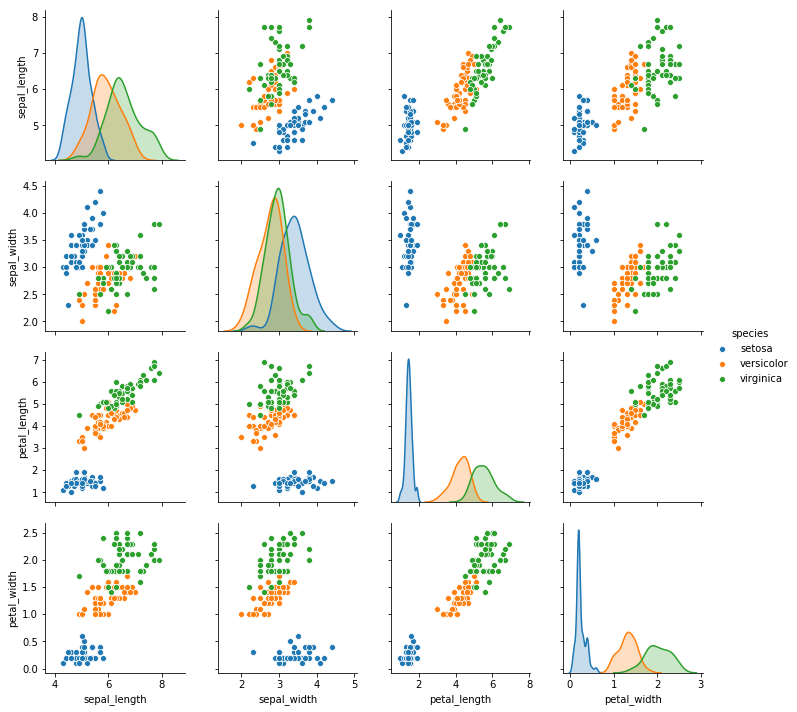

In [16]:
sns.pairplot(iris_df, hue="species")

In [17]:
x = iris_df.iloc[:, 2:4]
y = iris_df.species

In [18]:
tree_clf = DecisionTreeClassifier(max_depth=10)
tree_clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
petal_size = 6
petal_width = 0.5
tree_clf.predict([
    [petal_size, petal_width]
])

array(['setosa'], dtype=object)

In [20]:
!pip install pydotplus

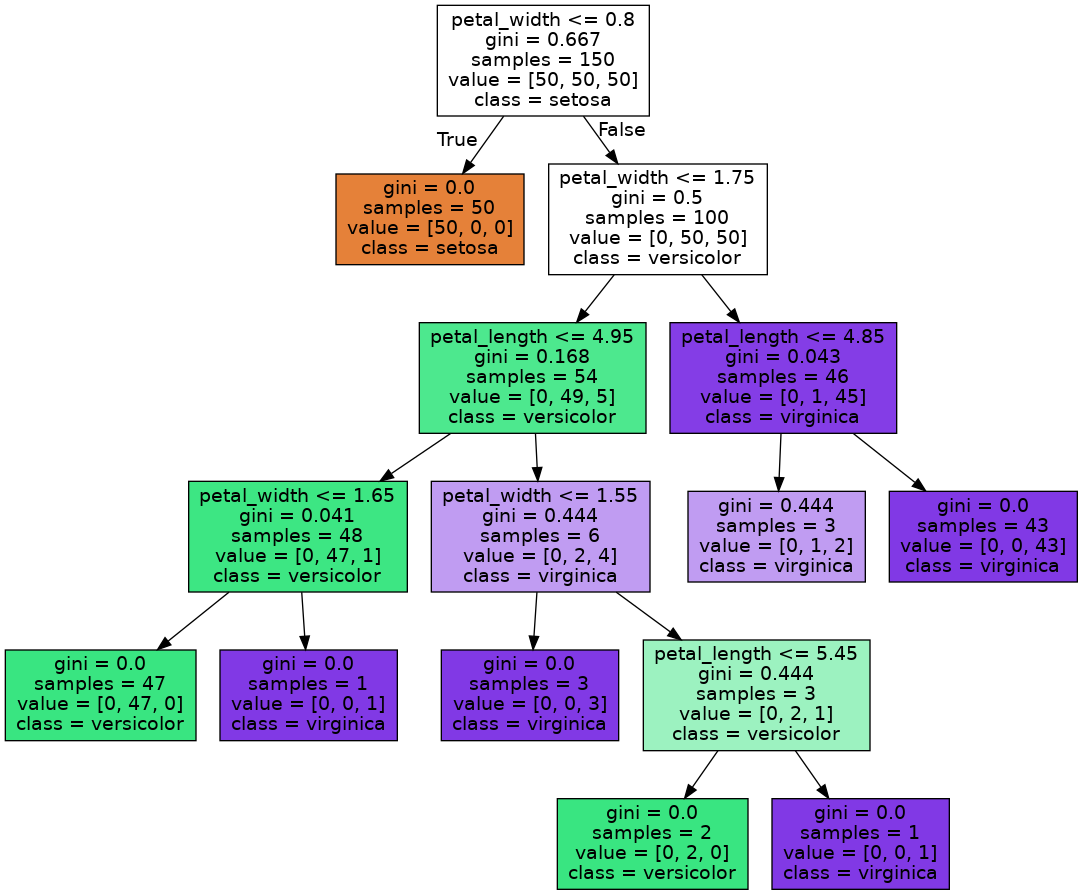

In [21]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

classes = iris_df.species.unique()

export_graphviz(
    tree_clf,
    out_file = dot_data,
    filled = True,
    feature_names = iris_df.columns[2:4],
    class_names = classes
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot_countour(depth = 200):
    
    iris = load_iris()
    X = iris.data[:, 2:] #petal length and width
    y = iris.target 
    
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(x,y)
    
    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx,yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    #plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, z, cmap=plt.cm.RdYlBu, alpha=0.5)
    
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    
    #Plot the training_points
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor = 'black', s=20)
        
    plt.suptitle('Decision surface of a decision tree using  paired features')
    plt.legend(loc='lower right')

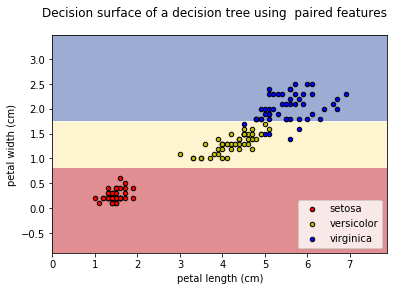

In [23]:
plot_countour(depth=2)

In [24]:
petal_lenght = 2.5
petal_width = 1.8

probs = tree_clf.predict_proba([[petal_lenght, petal_width]])
print(probs)
print(classes)

[[0.         0.33333333 0.66666667]]
['setosa' 'versicolor' 'virginica']


Text(0, 0.5, 'Probabilities')

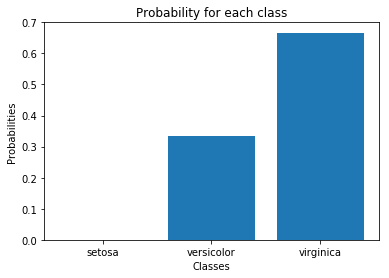

In [25]:
values = probs[0]
plt.bar(classes, values)
plt.title("Probability for each class")

plt.xlabel("Classes")
plt.ylabel("Probabilities")

In [26]:
g_1 = 1 - (0/50)**2 - (50/50)**2 - (0/50)**2
g_1

0.0